<a href="https://colab.research.google.com/github/ErikaRochadeAraujo/APIBancoCentral-IPCA/blob/main/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com APIs
## Estudo de caso: Banco Central

O exercício a ser desenvolvido para a presente unidade consiste em conectar-se a uma API. O Banco Central do Brasil disponibiliza dados a respeito de diversos indicadores econômicos do país. Sua tarefa será encontrar a série histórica relativa à inflação (IPCA) na plataforma de dados abertos do BC, importá-la e transformá-la em um DataFrame do Pandas.





In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Em minhas pesquisas achei
https://dadosabertos.bcb.gov.br/dataset/10844-indice-de-precos-ao-consumidor-amplo-ipca---servicos/resource/c0980df7-ad92-47af-b71c-790825f4710a

Interface json do serviço BCData/SGS - Sistema Gerenciador de Séries Temporais.

Para acessar o serviço é necessário utilizar o endereço padrão e informar os seguintes parâmetros:

Endereço padrão:http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}

Parâmetros:

codigo_Serie (obrigatório): parâmetro numérico que representa o código da série a ser consultada.

dataInicial (opcional): parâmetro textual que representa a data de início da consulta, no formato dd/MM/aaaa.

dataFinal (opcional): parâmetro textual que representa a data final da consulta, no formato dd/MM/aaaa.

In [3]:
api = pd.read_json('https://api.bcb.gov.br/dados/serie/bcdata.sgs.10844/dados?formato=json')

## Explorando os dados 

In [4]:
api

,data,valor
0,01/01/1992,25.84
1,01/02/1992,22.17
2,01/03/1992,20.74
3,01/04/1992,20.14
4,01/05/1992,26.93
...,...,...
362,01/03/2022,0.45
363,01/04/2022,0.66
364,01/05/2022,0.85
365,01/06/2022,0.90


In [5]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    367 non-null    object 
 1   valor   367 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.9+ KB


Achei interessante trazer para tipo data a coluna data para ter como separar ano e mês da coluna

In [6]:
from datetime import date
#api['ano'] = api['data'(yyyy)]
api['data'] = pd.to_datetime(api['data'])

In [7]:
api['ano'] = api['data'].dt.year 
api['mes'] = api['data'].dt.day

Para dar uma visualização melhor dos dados, separei de 1998 em diante. 
Antes temos numros de IPCA muito altos, houve a troca da moeda de cruzeiro para real e tudo isso afetou muito os valores.


In [8]:
import seaborn as sns

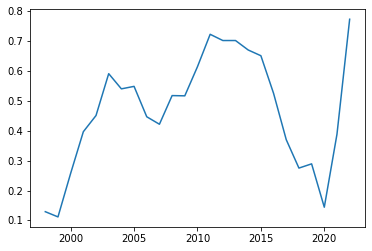

In [50]:
from pandas.core.groupby import groupby

api2 = api[(api['ano'] >1997)]
mediav = api2.groupby('ano')['valor'].mean()
plt.plot(mediav)

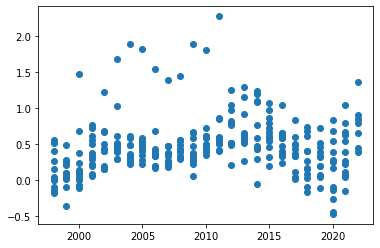

In [57]:
fig, ax = plt.subplots()
ax.scatter(api2['ano'], api2['valor'])

In [39]:
api2

,data,valor,ano,mes
84,1999-01-01,0.49,1999,1
85,1999-01-02,-0.36,1999,2
86,1999-01-03,0.26,1999,3
87,1999-01-04,0.10,1999,4
88,1999-01-05,0.22,1999,5
...,...,...,...,...
362,2022-01-03,0.45,2022,3
363,2022-01-04,0.66,2022,4
364,2022-01-05,0.85,2022,5
365,2022-01-06,0.90,2022,6


In [51]:
mediav

ano
1998    0.129167
1999    0.111667
2000    0.257500
2001    0.396667
2002    0.450833
2003    0.590833
2004    0.540000
2005    0.548333
2006    0.446667
2007    0.421667
2008    0.517500
2009    0.516667
2010    0.614167
2011    0.722500
2012    0.701667
2013    0.701667
2014    0.670000
2015    0.650833
2016    0.525000
2017    0.370000
2018    0.275000
2019    0.289167
2020    0.144167
2021    0.388333
2022    0.772857
Name: valor, dtype: float64

Conforme vou aprendendo novos comandos que posso melhorar esse estudo, irei modificar aqui